In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/yuhsinliu1993/Quora_QuestionPairs_DL/master/data/train.csv')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.sample()

,id,qid1,qid2,question1,question2,is_duplicate
191364,191364,290679,290680,How did you get into the University of Washing...,Is University of Washington hard to get into?,0


In [6]:
new_df = df.sample(30000 , random_state=34)

In [7]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [8]:
new_df.duplicated().sum()

0

In [9]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
304757,What are the best quotes from Catch-22?,"What is a ""catch 22"" and what are some example..."
254993,Can there be floods in Chennai this year 2016?,Why is biological neural activity a wave funct...
23730,Which are the low investment high profit busin...,What are the good profitable trading businesse...
220751,"Based on your experiences, what country has th...",What country has the friendliest people? And l...
141868,What is the remainder when 9! is divided by 11?,What is the remainder when 7^2015 is divided b...


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
question = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [11]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [12]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [13]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
304757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141868,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print("Number of unique questions",np.unique(qid).shape[0])
print("Number of duplicate questions",np.shape(qid)[0] - np.unique(qid).shape[0])

Number of unique questions 55376
Number of duplicate questions 4624


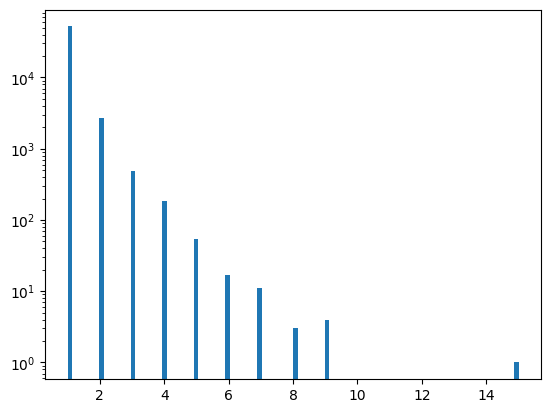

In [16]:
plt.hist(qid.value_counts(),bins=100)
plt.yscale('log')
plt.show()

In [17]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [18]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row:len(row.split(" ")))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [20]:
def common_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [21]:
new_df['word_common'] = new_df.apply(common_words,axis=1)

In [23]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [24]:
new_df['word_total'] = new_df.apply(total_words,axis=1)

In [25]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

<ipython-input-27-802cf8f2e081>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_len'])


Minimum character 1
Minimum character 354
Average num of character 59


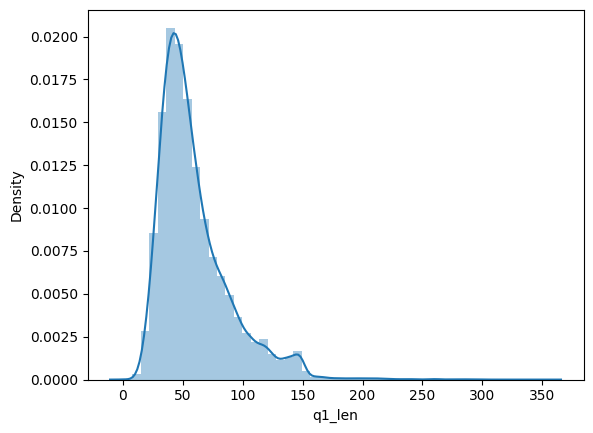

In [27]:
sns.distplot(new_df['q1_len'])
print("Minimum character" , new_df['q1_len'].min())
print("Minimum character" , new_df['q1_len'].max())
print("Average num of character",int(new_df['q1_len'].mean()))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)